<a href="https://colab.research.google.com/github/sanvigupta14/WIDS_midterm/blob/main/EquityClassifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# loading dataset

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/dataset_top1000companies.csv')

print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of dataset: (999, 31)
Columns: Index(['Company Name', 'Industry group', 'ISIN code', 'NSE symbol', 'Date',
       'Total income from continuing operations', 'Net sales',
       'Change in stock', 'Total expenses',
       'Raw materials, stocks, spares, purchase of finished goods',
       'Interest expenses', 'Depreciation', 'Total tax provision',
       'Net Profit/(Loss) for the period from continuing operations (after tax)',
       'Reported Profit after tax', 'PBT', 'PBDT', 'PBDIT', 'PBIT net of P&E',
       'Earnings per share before extraordinary item', 'Closing Price',
       'Date.1', 'Closing Price.1', 'Shares Outstanding',
       'Market Capitalisation', 'EPS', 'P/E', 'Number of Transactions',
       'Enterprise value', 'Industry P/E', 'Beta'],
      dtype='object')


,Company Name,Industry group,ISIN code,NSE symbol,Date,Total income from continuing operations,Net sales,Change in stock,Total expenses,"Raw materials, stocks, spares, purchase of finished goods",...,Date.1,Closing Price.1,Shares Outstanding,Market Capitalisation,EPS,P/E,Number of Transactions,Enterprise value,Industry P/E,Beta
0,3M India Ltd.,"Plastic furniture, floorings & miscellaneous i...",INE470A01017,3MINDIA,31-12-2022,943.41,932.22,-12.09,818.55,562.38,...,31-01-2023,23145.65,11265070,26073.736750,346.895314,66.722291,267,24891.636750,52.52,0.815759
1,A B B India Ltd.,"Generators, transformers & switchgears",INE117A01022,ABB,31-12-2022,2496.92,2426.91,-12.97,2178.04,1475.34,...,31-01-2023,2826.55,211908375,59896.961740,29.890749,94.562703,1956,56780.971740,78.35,0.768015
2,A C C Ltd.,Cement,INE012A01025,ACC,31-12-2022,4577.66,4536.97,-118.56,4348.65,1169.52,...,31-01-2023,1969.35,187787263,36981.884640,37.249065,52.869783,8437,30181.494640,48.83,0.976876
3,A D F Foods Ltd.,Processed foods,INE982B01027,ADFFOODS,31-12-2022,102.34,99.77,-3.64,79.48,38.81,...,31-01-2023,763.05,21972719,1676.628323,23.524626,32.436222,372,1585.448323,67.56,1.414542
4,A G I Greenpac Ltd.,Glass & glassware,INE415A01038,AGI,31-12-2022,570.40,567.30,12.31,529.48,199.24,...,31-01-2023,326.05,64697381,2109.458108,24.643965,13.230420,1510,3226.098108,33.34,1.149549


In [22]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('/', '', regex=False)
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

df.columns

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date.1'] = pd.to_datetime(df['date.1'], errors='coerce')
id_cols = ['company_name', 'industry_group', 'isin_code', 'nse_symbol']
num_cols = df.columns.difference(id_cols)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 998
Data columns (total 31 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   company_name                                                        991 non-null    object 
 1   industry_group                                                      991 non-null    object 
 2   isin_code                                                           991 non-null    object 
 3   nse_symbol                                                          979 non-null    object 
 4   date                                                                991 non-null    int64  
 5   total_income_from_continuing_operations                             991 non-null    float64
 6   net_sales                                                           991 non-null    float64
 7   change_in_stock       

In [19]:
print("Columns:", df.columns)

Columns: Index(['company_name', 'industry_group', 'isin_code', 'nse_symbol', 'date',
       'total_income_from_continuing_operations', 'net_sales',
       'change_in_stock', 'total_expenses',
       'raw_materials,_stocks,_spares,_purchase_of_finished_goods',
       'interest_expenses', 'depreciation', 'total_tax_provision',
       'net_profitloss_for_the_period_from_continuing_operations_after_tax',
       'reported_profit_after_tax', 'pbt', 'pbdt', 'pbdit', 'pbit_net_of_p&e',
       'earnings_per_share_before_extraordinary_item', 'closing_price',
       'date.1', 'closing_price.1', 'shares_outstanding',
       'market_capitalisation', 'eps', 'pe', 'number_of_transactions',
       'enterprise_value', 'industry_pe', 'beta'],
      dtype='object')


In [7]:
#removing outliers

df = df[
    (df['market_capitalisation'] > 0) &
    (df['net_sales'] > 0) &
    (df['shares_outstanding'] > 0)
]

df.shape

(991, 31)

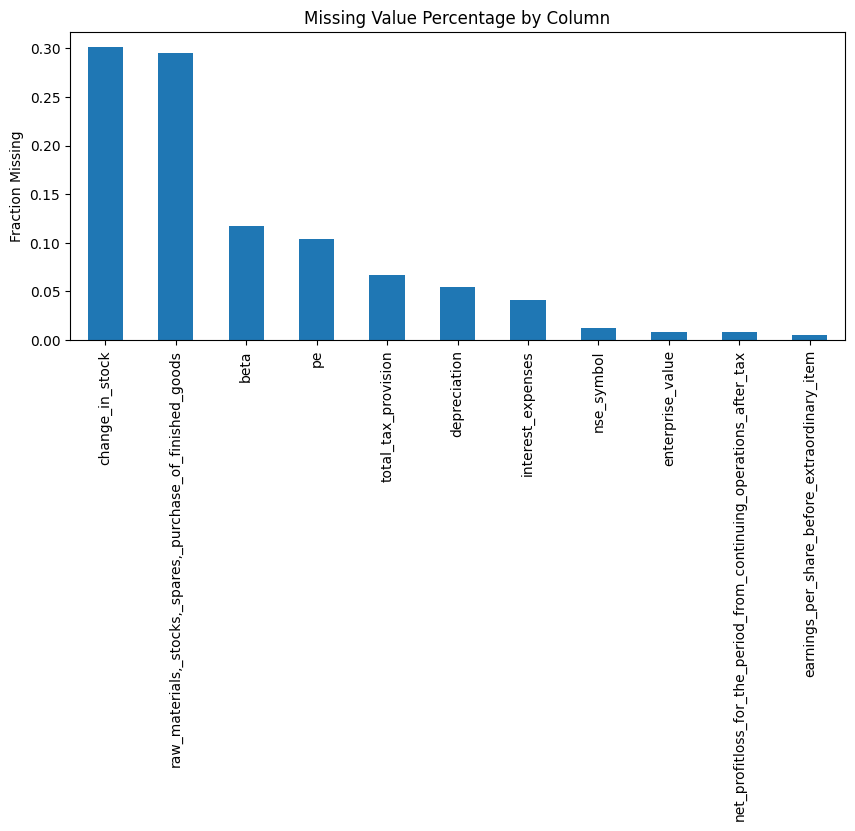

In [12]:
missing_pct = df.isnull().mean().sort_values(ascending=False)
missing_pct

import matplotlib.pyplot as plt

missing_pct[missing_pct > 0].plot(kind='bar', figsize=(10,4))
plt.title("Missing Value Percentage by Column")
plt.ylabel("Fraction Missing")
plt.show()

In [13]:
print("Shape:", df.shape)
df.describe().T

Shape: (991, 31)


,count,mean,std,min,25%,50%,75%,max
date,991.0,1.672445e+18,4.226133e+04,1.672445e+18,1.672445e+18,1.672445e+18,1.672445e+18,1.672445e+18
total_income_from_continuing_operations,991.0,2.976474e+03,1.270589e+04,2.000000e-01,2.229650e+02,5.450700e+02,1.460190e+03,2.064553e+05
net_sales,991.0,2.728028e+03,1.120223e+04,7.000000e-02,2.053450e+02,5.302700e+02,1.378180e+03,2.047402e+05
change_in_stock,692.0,-1.190282e+01,2.679369e+02,-2.991910e+03,-1.131750e+01,1.410000e+00,1.903000e+01,1.748740e+03
total_expenses,991.0,2.712547e+03,1.194865e+04,2.600000e-01,1.935700e+02,5.088000e+02,1.356530e+03,2.042097e+05
"raw_materials,_stocks,_spares,_purchase_of_finished_goods",698.0,1.718023e+03,9.881651e+03,2.000000e-01,1.252825e+02,3.095100e+02,7.671725e+02,1.851766e+05
interest_expenses,950.0,3.181353e+02,2.085375e+03,1.000000e-02,1.830000e+00,6.765000e+00,3.050750e+01,4.854742e+04
depreciation,937.0,8.224831e+01,4.077664e+02,1.000000e-02,4.710000e+00,1.369000e+01,3.647000e+01,6.661100e+03
total_tax_provision,925.0,8.300875e+01,3.607054e+02,-1.373980e+03,5.100000e+00,1.325000e+01,4.180000e+01,5.253370e+03
net_profitloss_for_the_period_from_continuing_operations_after_tax,983.0,2.407292e+02,1.097621e+03,-7.954000e+03,1.424000e+01,3.923000e+01,1.225700e+02,1.420534e+04


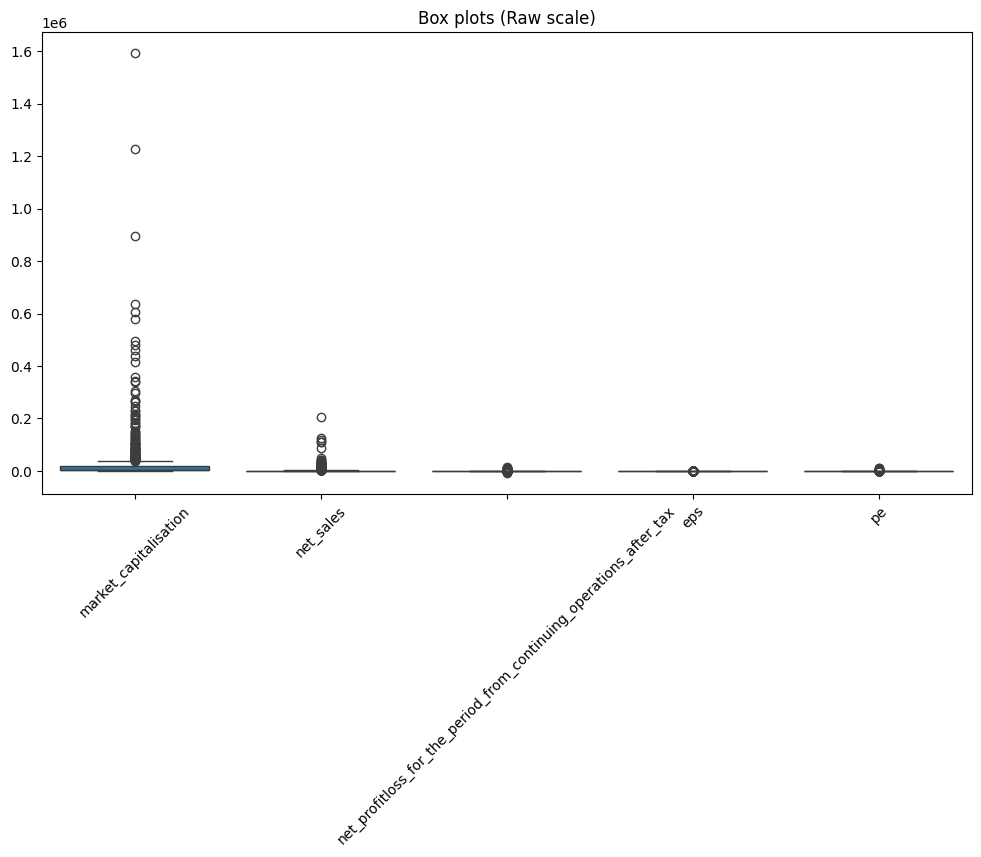

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = [
    'market_capitalisation',
    'net_sales',
    'net_profitloss_for_the_period_from_continuing_operations_after_tax',
    'eps',
    'pe'
]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Box plots (Raw scale)")
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


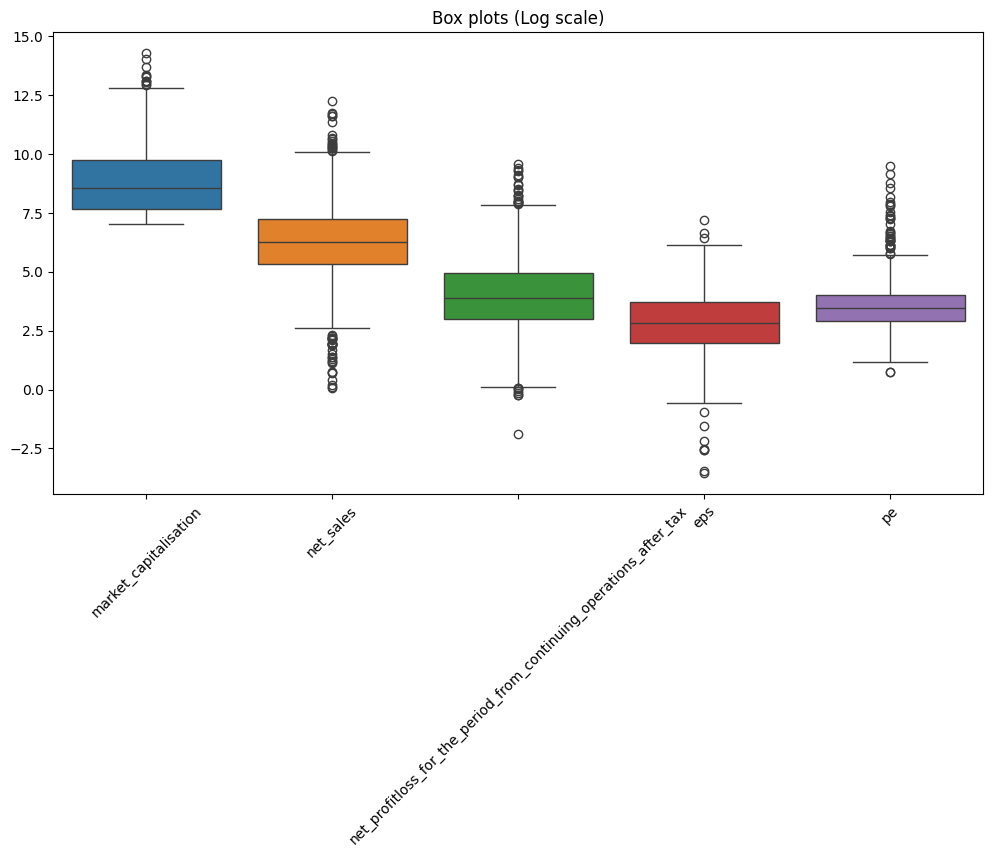

In [15]:
#converting to log for easier understanding

import numpy as np

log_df = df[num_features].copy()

for col in log_df.columns:
    log_df[col] = np.log1p(log_df[col])  # log(1+x) handles zero safely

plt.figure(figsize=(12,6))
sns.boxplot(data=log_df)
plt.xticks(rotation=45)
plt.title("Box plots (Log scale)")
plt.show()

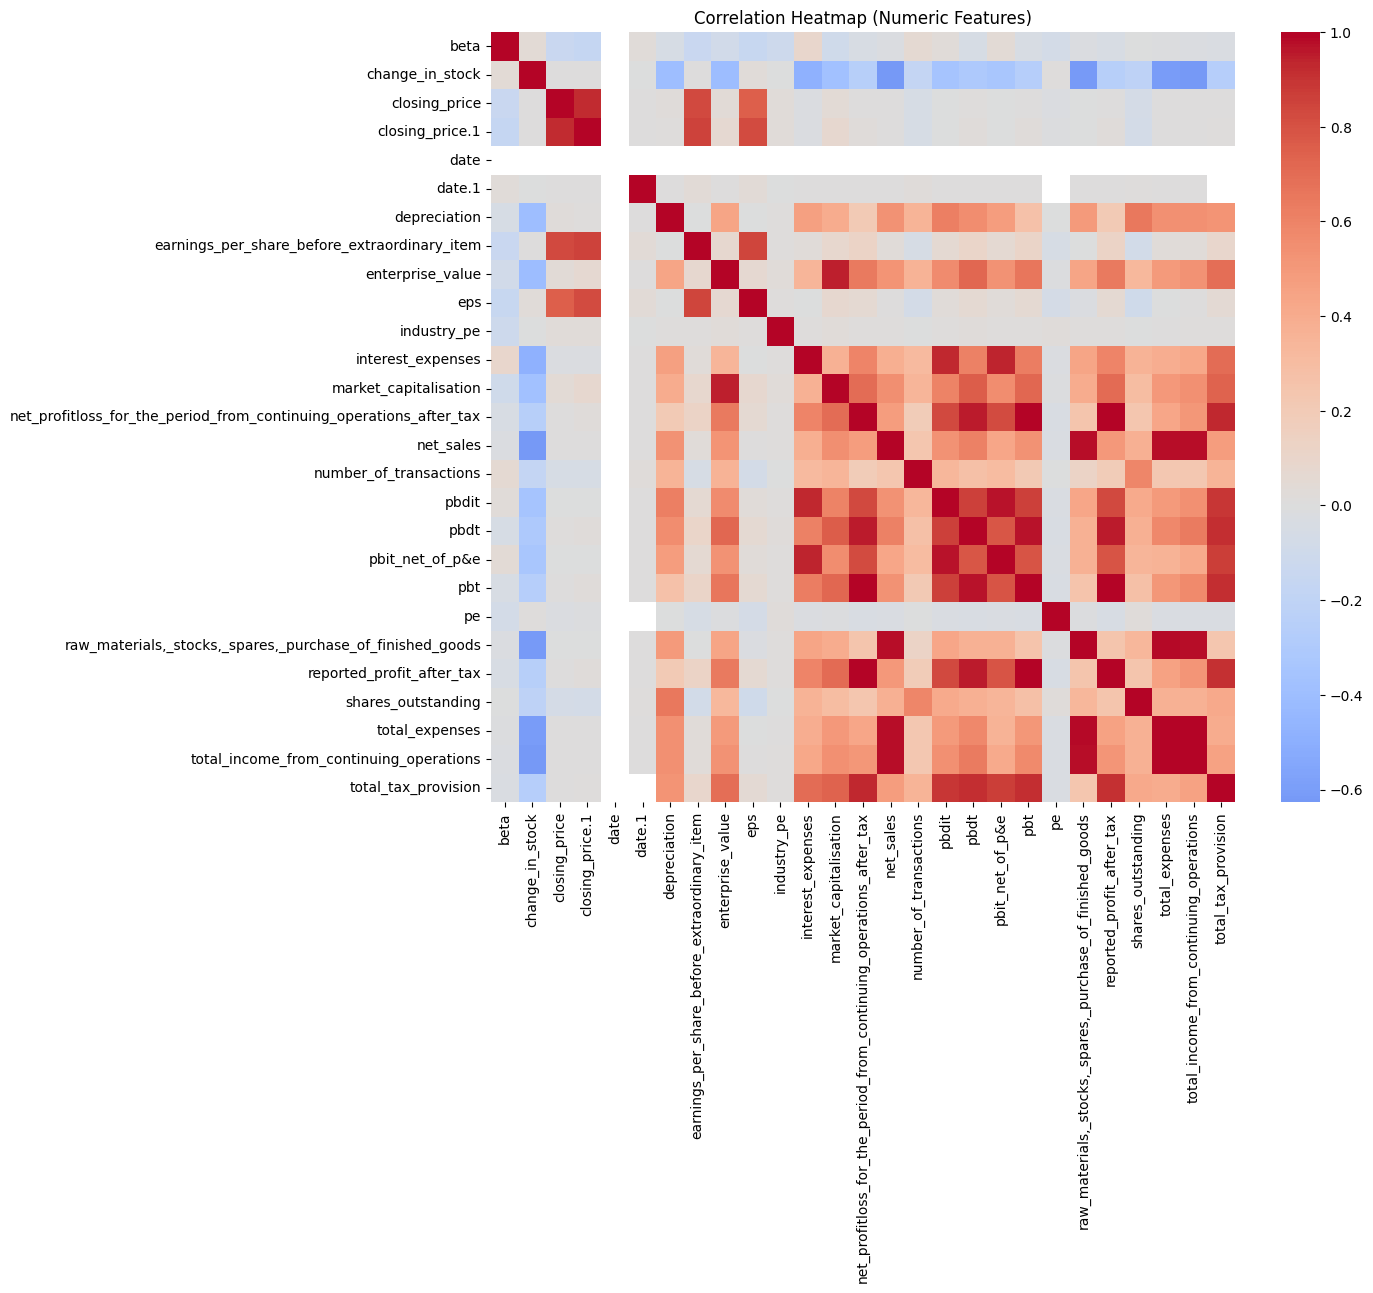

In [16]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [26]:
#financial ratios

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace(",", "")
      .str.replace("&", "and")
)

def safe_divide(n, d):
    return np.where(d == 0, np.nan, n / d)

df["gross_profit"] = (
    df["net_sales"]
    - df["raw_materials_stocks_spares_purchase_of_finished_goods"]
    + df["change_in_stock"]
)

df["operating_profit"] = df["pbit_net_of_pande"]
df["net_profit"] = df["reported_profit_after_tax"]

df["gross_margin"] = safe_divide(df["gross_profit"], df["net_sales"])
df["operating_margin"] = safe_divide(df["operating_profit"], df["net_sales"])
df["net_margin"] = safe_divide(df["net_profit"], df["net_sales"])
df["ebitda_margin"] = safe_divide(df["pbdt"], df["net_sales"])
df["interest_coverage"] = safe_divide(
    df["pbit_net_of_pande"],
    df["interest_expenses"]
)
df["ev_to_ebitda"] = safe_divide(
    df["enterprise_value"],
    df["pbdt"]
)
df["relative_pe"] = safe_divide(df["pe"], df["industry_pe"])
df["log_market_cap"] = np.log(df["market_capitalisation"])
df["log_turnover"] = np.log(df["number_of_transactions"] + 1)

features = [
    "gross_margin",
    "operating_margin",
    "net_margin",
    "ebitda_margin",

    "interest_coverage",
    "ev_to_ebitda",
    "beta",
    "pe",
    "relative_pe",

    "log_market_cap",
    "log_turnover"
]